## This is the start of the code for the first repo by Anton Kruse

This project aims to get an overlook of perfomances of ETF´s, including a investment strategy & to examine if the choice of my own ETF has been a good one.

We keep it first of simple and use a given "best of" from https://www.etf.com/sections/features-and-news/best-performing-etfs-year. This list shows the best performing ETF within the first half of the year 2022. Due to the market circumstances, this set includes mainly commodity and energy ETF. Since my scope is is to examine my own decision to buy certain ETF, I will and the to this set. Furtmore, the set excludes leveraged and inversed ETF´s. 

In [72]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas_datareader.data as web
import datetime
import yfinance as yf

How exactly does the plan for this code look like?

Well, first of all required data must be found. Since I could not find any platform which has the power to show me the best performing ETFs over the last 5 years, while only showing the best ETF per sector, I decided to move on differently. The 5 biggest suppliers are: iShares (IS, Blackrock), Amundi,..
On their websites I got information about their 4 biggest ETFs with respect to the Net Assets. Furtmermore, I included the 4 ETFs I personally invest in since several years. The aim is to examine, if my choice has been good or not.

Step 1: loading the data and showing different approaches how to do this.
Step 2: give an overview about the data and the performance
Step 3:

In [78]:
# Step 1 - importing data individually
start = datetime.datetime(2018,1,1)
end = datetime.datetime.today()

ivv_df = web.DataReader('IVV', 'yahoo', start=start, end=end)
iefa_df = web.DataReader('IEFA', 'yahoo', start=start, end=end)
agg_df = web.DataReader('AGG', 'yahoo', start=start, end=end)
ijr_df = web.DataReader('IJR', 'yahoo', start=start, end=end)

# proof that it worked
ivv_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,270.850006,269.369995,269.839996,270.850006,8545200.0,248.559143
2018-01-03,272.630005,270.950012,271.049988,272.420013,3768400.0,249.999985
2018-01-04,274.170013,273.109985,273.230011,273.600006,3394700.0,251.082855
2018-01-05,275.559998,273.980011,274.549988,275.329987,4150500.0,252.670334
2018-01-08,276.109985,274.989990,275.369995,275.940002,2881800.0,253.230225


In [79]:
# Step 1 - importing data by defining a function that loads the required data
def get_stock(ticker):
    data = yf.download(f"{ticker}",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    return data

ivv = get_stock('IVV')
ivv.head()

[*********************100%***********************]  1 of 1 completed


,IVV
Date,
2018-01-02,270.850006
2018-01-03,272.420013
2018-01-04,273.600006
2018-01-05,275.329987
2018-01-08,275.940002


In [ ]:
# Step 1 - importing data by defining a for loop that gets the tickers from a list
ticker = ['IVV', 'IEFA', 'AGG', 'IJR']

Conclusion Step 1:

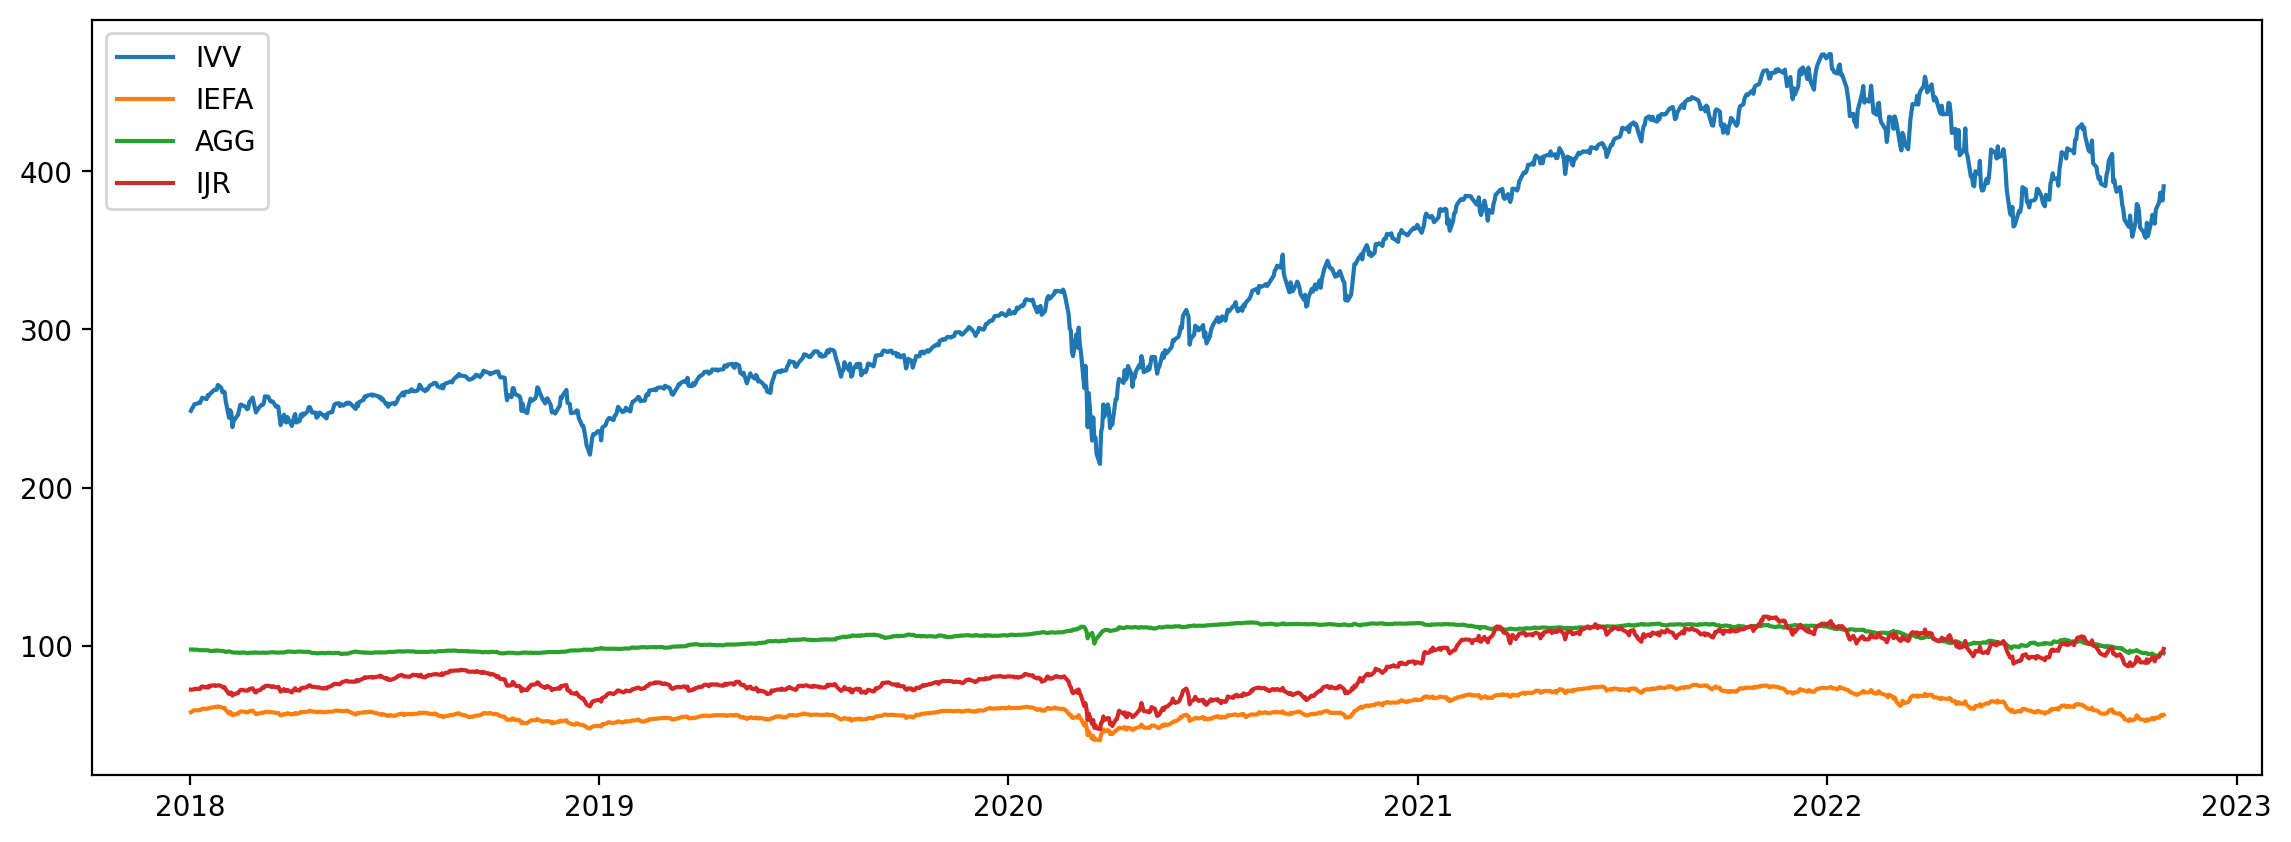

In [65]:
# print the absolute change of these assets
fig, ax = plt.subplots(figsize=(14,5), dpi=200)

ax.plot(ivv_df["Adj Close"], label="IVV")
ax.plot(iefa_df["Adj Close"], label="IEFA")
ax.plot(agg_df["Adj Close"], label="AGG")
ax.plot(ijr_df["Adj Close"], label="IJR")

plt.legend()
plt.show();

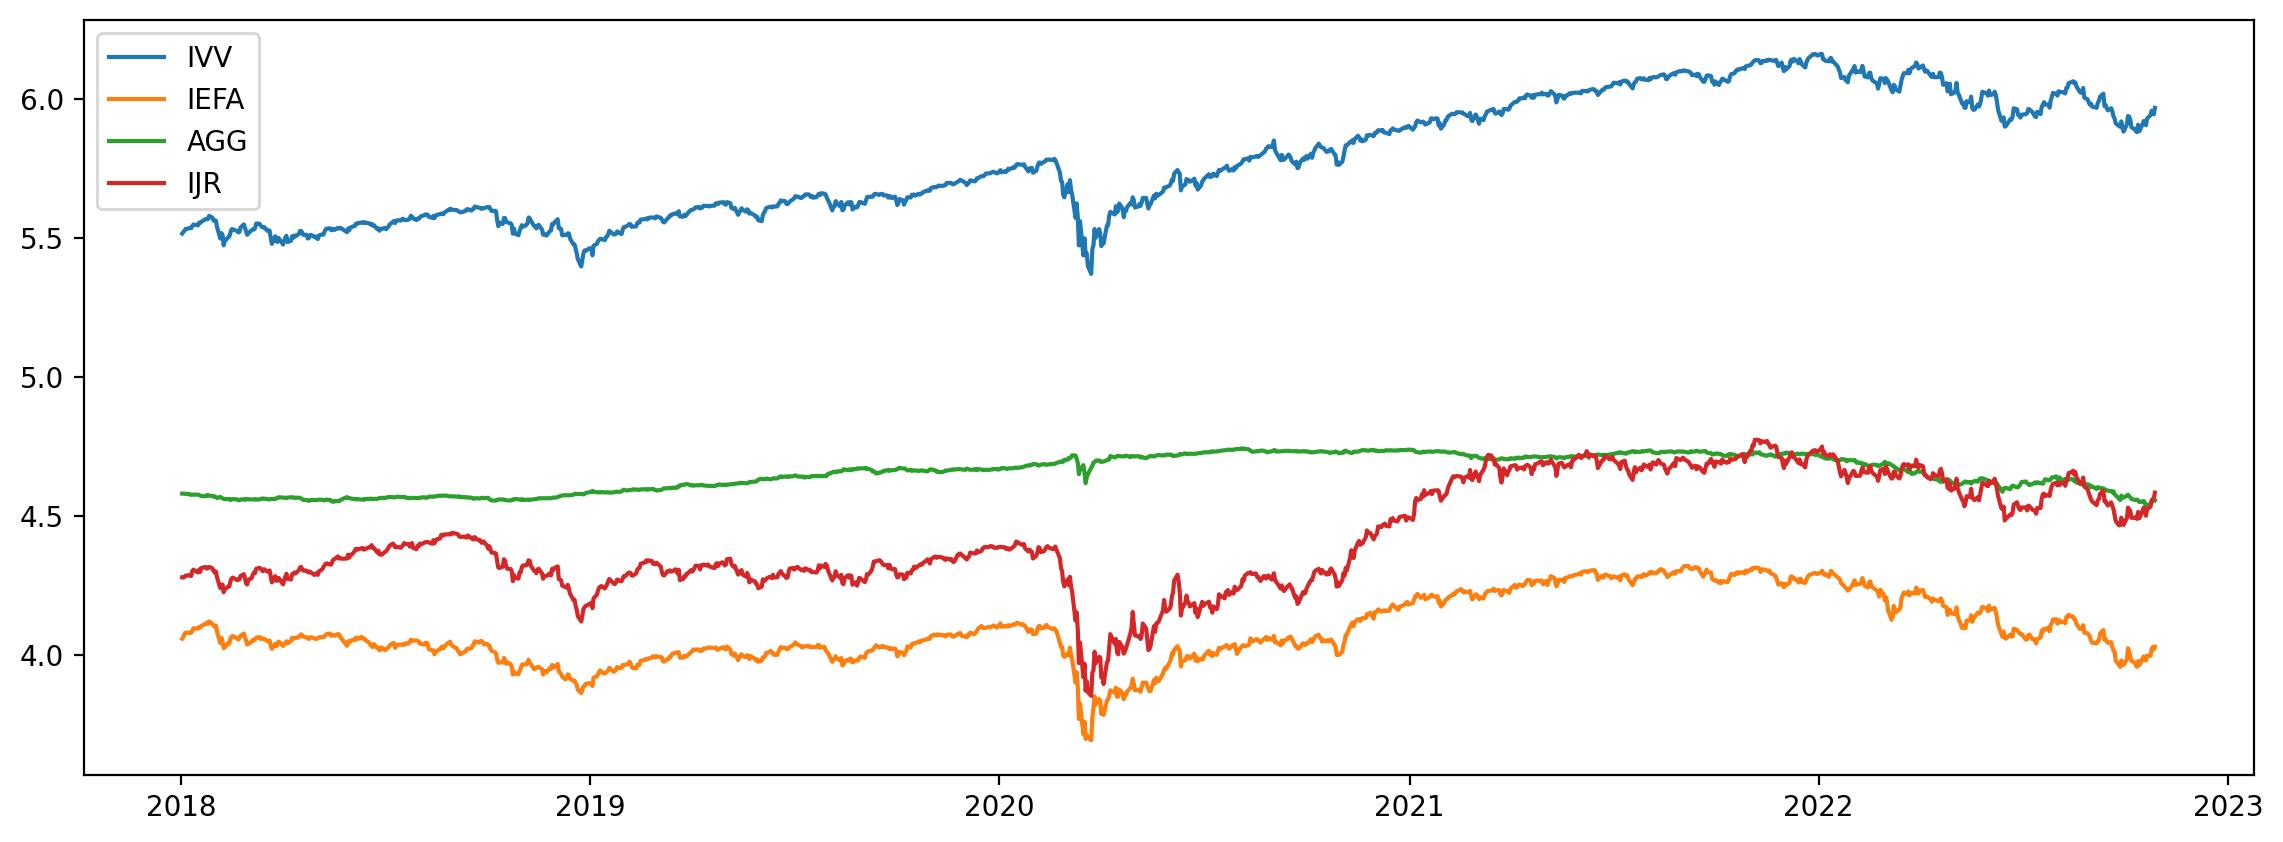

In [71]:
# to compare the change of assets over time, a common approach is to normalize the values
ivv_rel = np.log(ivv_df["Adj Close"])
iefa_rel = np.log(iefa_df["Adj Close"])
agg_rel = np.log(agg_df["Adj Close"])
ijr_rel = np.log(ijr_df["Adj Close"])

# plotting
fig, ax = plt.subplots(figsize=(14,5), dpi=200)

ax.plot(ivv_rel, label="IVV")
ax.plot(iefa_rel, label="IEFA")
ax.plot(agg_rel, label="AGG")
ax.plot(ijr_rel, label="IJR")

plt.legend()
plt.show();